In [69]:
import pandas as pd
import numpy as np
from Preprocessing import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier, SGDRegressor, Lasso , Ridge
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, explained_variance_score, mean_absolute_error,r2_score,mean_squared_error,accuracy_score,precision_score ,recall_score
from xgboost import XGBClassifier
import xgboost as xgb
from eli5 import show_weights
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
Withcategorie = pd.read_csv('data/rdyforml/Withcategorie.csv')
Withdeuxcentdummies = pd.read_csv('data/rdyforml/Withdeuxcentdummies.csv')
SalarycategWithcategorie = pd.read_csv('data/rdyforml/SalarycategWithcategorie.csv')
SalarycategWithdeuxcentdummies = pd.read_csv('data/rdyforml/SalarycategWithdeuxcentdummies.csv')

In [3]:
Withcategorie = Withcategorie.drop(['TypeContrat','Description','Link'],axis=1)
Withdeuxcentdummies = Withdeuxcentdummies.drop(['TypeContrat','Description','Link'],axis=1)
SalarycategWithcategorie = SalarycategWithcategorie.drop(['TypeContrat','Description','Link'],axis=1)
SalarycategWithdeuxcentdummies = SalarycategWithdeuxcentdummies.drop(['TypeContrat','Description','Link'],axis=1)

In [4]:
Withcategorie_traintest = Withcategorie[Withcategorie['Salary'] != 'notfound']
Withcategorie_apredict = Withcategorie[Withcategorie['Salary'] == 'notfound']
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Withdeuxcentdummies_traintest = Withdeuxcentdummies[Withdeuxcentdummies['Salary'] != 'notfound']
Withdeuxcentdummies_apredict = Withdeuxcentdummies[Withdeuxcentdummies['Salary'] == 'notfound']
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SalarycategWithcategorie_traintest = SalarycategWithcategorie[SalarycategWithcategorie['Salary'] != 'notfound']
SalarycategWithcategorie_apredict = SalarycategWithcategorie[SalarycategWithcategorie['Salary'] == 'notfound']
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SalarycategWithdeuxcentdummies_traintest = SalarycategWithdeuxcentdummies[SalarycategWithdeuxcentdummies['Salary'] != 'notfound']
SalarycategWithdeuxcentdummies_apredict = SalarycategWithdeuxcentdummies[SalarycategWithdeuxcentdummies['Salary'] == 'notfound']

In [5]:
y1=Withcategorie_traintest.pop('Salary')
DumsWithcategorie_traintest =pd.get_dummies(Withcategorie_traintest)
X1=DumsWithcategorie_traintest
Xtrain1,Xtest1,ytrain1,ytest1 = train_test_split(X1,y1,test_size= 0.3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
y2=Withdeuxcentdummies_traintest.pop('Salary')
DumsWithdeuxcentdummies_traintest =pd.get_dummies(Withdeuxcentdummies_traintest)
X2=DumsWithdeuxcentdummies_traintest
Xtrain2,Xtest2,ytrain2,ytest2 = train_test_split(X2,y2,test_size= 0.3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
y3=SalarycategWithcategorie_traintest.pop('Salary')
DumsSalarycategWithcategorie_traintest =pd.get_dummies(SalarycategWithcategorie_traintest)
X3=DumsSalarycategWithcategorie_traintest
Xtrain3,Xtest3,ytrain3,ytest3 = train_test_split(X3,y3,test_size= 0.3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
y4=SalarycategWithdeuxcentdummies_traintest.pop('Salary')
DumsSalarycategWithdeuxcentdummies_traintest =pd.get_dummies(SalarycategWithdeuxcentdummies_traintest)
X4=DumsSalarycategWithdeuxcentdummies_traintest
Xtrain4,Xtest4,ytrain4,ytest4 = train_test_split(X4,y4,test_size= 0.3)

<h1 style='text-align:center'>Random Forest </h1>

In [6]:
parametre = {
    'n_estimators': np.arange(10,90,10),
    'criterion': ('mae','mse'),
    'max_depth': np.arange(2,6),
    'min_samples_split': np.arange(2,5),
    'max_features':('auto','sqrt','log2', None),
    'bootstrap':(True,False)
}
clf = RandomForestRegressor(max_depth=2, random_state=0)
Forest1 = GridSearchCV(clf, parametre,verbose=1,n_jobs=4)
Forest1.fit(Xtrain1, ytrain1)
ypred1 = Forest1.predict(Xtest1)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Forest2 = GridSearchCV(clf, parametre,verbose=1,n_jobs=4)
Forest2.fit(Xtrain2, ytrain2)
ypred2 = Forest2.predict(Xtest2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
params = {'n_estimators':[50],
          'criterion':['gini','entropy'],
          'max_depth': np.arange(2,5),
          'max_features':['auto','sqrt','log2',None],
          'bootstrap':[True,False]
         }
thetree = RandomForestClassifier(random_state=7)
Forest3 = GridSearchCV(thetree, params,verbose=1,n_jobs=4)
Forest3.fit(Xtrain3, ytrain3)
ypred3 = Forest3.predict(Xtest3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Forest4 = GridSearchCV(thetree, params,verbose=1,n_jobs=4)
Forest4.fit(Xtrain4, ytrain4)
ypred4 = Forest4.predict(Xtest4)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done 364 tasks      | elapsed:   33.4s
[Parallel(n_jobs=4)]: Done 686 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 1172 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 2722 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 3444 tasks      | elapsed:  6.1min
[Parallel(n_jobs=4)]: Done 4608 out of 4608 | elapsed:  6.6min finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureW

Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.9s
[Parallel(n_jobs=4)]: Done 251 tasks      | elapsed:   33.6s
[Parallel(n_jobs=4)]: Done 554 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 948 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 2080 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done 2912 tasks      | elapsed:  8.7min
[Parallel(n_jobs=4)]: Done 3828 tasks      | elapsed: 13.5min
[Parallel(n_jobs=4)]: Done 4601 out of 4608 | elapsed: 13.9min remaining:    1.2s
[Parallel(n_jobs=4)]: Done 4608 out of 4608 | elapsed: 13.9min finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The 

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 137 out of 144 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 144 out of 144 | elapsed:    2.8s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be les

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 137 out of 144 | elapsed:    3.3s remaining:    0.1s
[Parallel(n_jobs=4)]: Done 144 out of 144 | elapsed:    3.6s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


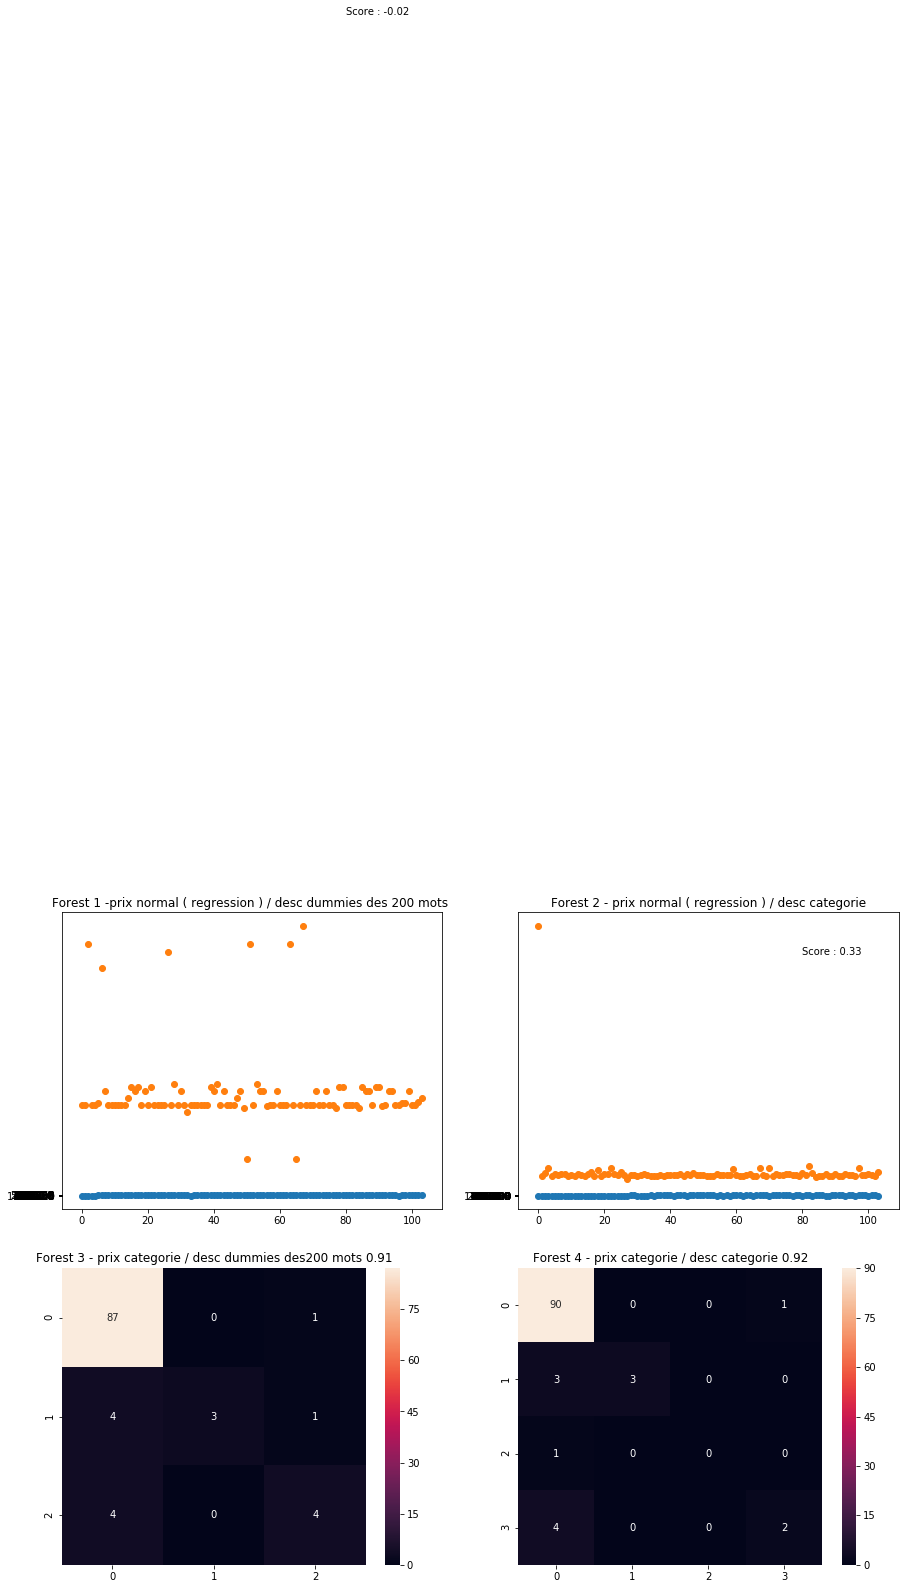

In [7]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.scatter(range(len(ytest1)),ytest1)
plt.scatter(range(len(ypred1)),ypred1)
plt.text(80,500000,"Score : "+str(round(Forest1.best_estimator_.score(Xtest1,ytest1),2)))
plt.title("Forest 1 -prix normal ( regression ) / desc dummies des 200 mots ")
plt.subplot(2,2,2)
plt.scatter(range(len(ytest2)),ytest2)
plt.scatter(range(len(ypred2)),ypred2)
plt.text(80,500000,"Score : "+str(round(Forest2.best_estimator_.score(Xtest2,ytest2),2)))
plt.title("Forest 2 - prix normal ( regression ) / desc categorie")
plt.subplot(2,2,3)
conf3 = confusion_matrix(ytest3,ypred3)
sns.heatmap(conf3,annot=True)
plt.title("Forest 3 - prix categorie / desc dummies des200 mots "+ str(round(Forest3.best_score_,2)))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.subplot(2,2,4)
conf4 = confusion_matrix(ytest4,ypred4)
sns.heatmap(conf4,annot=True)
plt.plot(label="Score : "+str(Forest4.best_score_))
plt.title("Forest 4 - prix categorie / desc categorie "+ str(round(Forest4.best_score_,2)))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [83]:
print('Variance:', explained_variance_score(ytest1,ypred1),'\nMae :', mean_absolute_error(ytest1,ypred1),'\nMse :', mean_squared_error(ytest1,ypred1),'\nR² :', r2_score(ytest1,ypred1),'\n')
print('Variance:', explained_variance_score(ytest2,ypred2),'\nMae :', mean_absolute_error(ytest2,ypred2),'\nMse :', mean_squared_error(ytest2,ypred2),'\nR² :', r2_score(ytest2,ypred2))
print(classification_report(ytest3,ypred3))
print(classification_report(ytest4,ypred4))
un = [explained_variance_score(ytest1,ypred1),mean_absolute_error(ytest1,ypred1),mean_squared_error(ytest1,ypred1),r2_score(ytest1,ypred1)]
deux = [explained_variance_score(ytest2,ypred2),mean_absolute_error(ytest2,ypred2),mean_squared_error(ytest2,ypred2),r2_score(ytest2,ypred2)]
resregforest = pd.DataFrame([un,deux],columns=["Variance","MAE",'MSE','R²'], index =['ForestReg1','ForestReg2'])
un = [precision_score(ytest3,ypred3,average="weighted"),recall_score(ytest3,ypred3,average="weighted"),accuracy_score(ytest3,ypred3)]
deux = [precision_score(ytest4,ypred4,average="weighted"),recall_score(ytest4,ypred4,average="weighted"),accuracy_score(ytest4,ypred4)]
resclassforest = pd.DataFrame([un,deux],columns=["Precision","Recall",'Accuracy'], index =['Forestclass1','Forestclass2'])
resclassforest

Variance: -1.1573440124202357 
Mae : 14499.772115384616 
Mse : 571520526.76125 
R² : -1.171484481557815 

Variance: -4.392399860327041 
Mae : 20055.862602780413 
Mse : 3235942170.49492 
R² : -4.405427193266296
                         precision    recall  f1-score   support

              25a60Kans       0.83      0.92      0.87        86
             60a200Kans       0.00      0.00      0.00         9
millionnairestoutlesans       0.00      0.00      0.00         1
          moinsde25Kans       0.17      0.12      0.14         8

               accuracy                           0.77       104
              macro avg       0.25      0.26      0.25       104
           weighted avg       0.70      0.77      0.73       104

                         precision    recall  f1-score   support

              25a60Kans       0.85      0.93      0.89        89
             60a200Kans       0.00      0.00      0.00         7
millionnairestoutlesans       0.00      0.00      0.00         1
      

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Precision,Recall,Accuracy
Forestclass1,0.700472,0.769231,0.769231
Forestclass2,0.724784,0.798077,0.798077


In [9]:
print('Forest 1',Forest1.best_params_)
print('Forest 2',Forest2.best_params_)
print('Forest 3',Forest3.best_params_)
print('Forest 4',Forest4.best_params_)

Forest 1 {'bootstrap': True, 'criterion': 'mae', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 10}
Forest 2 {'bootstrap': False, 'criterion': 'mse', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10}
Forest 3 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'n_estimators': 50}
Forest 4 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'n_estimators': 50}


<h1 style='text-align:center'>XG Boost </h1>

In [10]:
Withcategorie = pd.read_csv('data/rdyforml/Withcategorie.csv')
Withdeuxcentdummies = pd.read_csv('data/rdyforml/Withdeuxcentdummies.csv')
SalarycategWithcategorie = pd.read_csv('data/rdyforml/SalarycategWithcategorie.csv')
SalarycategWithdeuxcentdummies = pd.read_csv('data/rdyforml/SalarycategWithdeuxcentdummies.csv')

In [11]:
Withcategorie = Withcategorie.drop(['TypeContrat','Description','Link'],axis=1)
Withdeuxcentdummies = Withdeuxcentdummies.drop(['TypeContrat','Description','Link'],axis=1)
SalarycategWithcategorie = SalarycategWithcategorie.drop(['TypeContrat','Description','Link'],axis=1)
SalarycategWithdeuxcentdummies = SalarycategWithdeuxcentdummies.drop(['TypeContrat','Description','Link'],axis=1)

In [12]:
Withcategorie_traintest = Withcategorie[Withcategorie['Salary'] != 'notfound']
Withcategorie_apredict = Withcategorie[Withcategorie['Salary'] == 'notfound']
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Withdeuxcentdummies_traintest = Withdeuxcentdummies[Withdeuxcentdummies['Salary'] != 'notfound']
Withdeuxcentdummies_apredict = Withdeuxcentdummies[Withdeuxcentdummies['Salary'] == 'notfound']
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SalarycategWithcategorie_traintest = SalarycategWithcategorie[SalarycategWithcategorie['Salary'] != 'notfound']
SalarycategWithcategorie_apredict = SalarycategWithcategorie[SalarycategWithcategorie['Salary'] == 'notfound']
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SalarycategWithdeuxcentdummies_traintest = SalarycategWithdeuxcentdummies[SalarycategWithdeuxcentdummies['Salary'] != 'notfound']
SalarycategWithdeuxcentdummies_apredict = SalarycategWithdeuxcentdummies[SalarycategWithdeuxcentdummies['Salary'] == 'notfound']

In [13]:
Sc = StandardScaler()
y1=Withcategorie_traintest.pop('Salary')
DumsWithcategorie_traintest =pd.get_dummies(Withcategorie_traintest)
Sc.fit(DumsWithcategorie_traintest)
SCDumsWithcategorie_traintest = Sc.transform(DumsWithcategorie_traintest)
SCDumsWithcategorie_traintest= pd.DataFrame(SCDumsWithcategorie_traintest,columns=DumsWithcategorie_traintest.columns)
X1=SCDumsWithcategorie_traintest
Xtrain1,Xtest1,ytrain1,ytest1 = train_test_split(X1,y1,test_size= 0.3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
y2=Withdeuxcentdummies_traintest.pop('Salary')
DumsWithdeuxcentdummies_traintest =pd.get_dummies(Withdeuxcentdummies_traintest)
SCDumsWithdeuxcentdummies_traintest = Sc.fit_transform(DumsWithdeuxcentdummies_traintest)
X2=SCDumsWithdeuxcentdummies_traintest
Xtrain2,Xtest2,ytrain2,ytest2 = train_test_split(X2,y2,test_size= 0.3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
y3=SalarycategWithcategorie_traintest.pop('Salary')
DumsSalarycategWithcategorie_traintest =pd.get_dummies(SalarycategWithcategorie_traintest)
X3=DumsSalarycategWithcategorie_traintest
Xtrain3,Xtest3,ytrain3,ytest3 = train_test_split(X3,y3,test_size= 0.3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
y4=SalarycategWithdeuxcentdummies_traintest.pop('Salary')
DumsSalarycategWithdeuxcentdummies_traintest =pd.get_dummies(SalarycategWithdeuxcentdummies_traintest)
X4=DumsSalarycategWithdeuxcentdummies_traintest
Xtrain4,Xtest4,ytrain4,ytest4 = train_test_split(X4,y4,test_size= 0.3)

In [14]:
parametre= {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}
xg_reg = xgb.XGBRegressor(objective='reg:tweedie')
ytrain1 = pd.to_numeric(ytrain1)
Xgboost1 = GridSearchCV(xg_reg, parametre,verbose=1,n_jobs=4)
Xgboost1.fit(Xtrain1, ytrain1)
ypredXgboost1 = Xgboost1.predict(Xtest1)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ytrain2 = pd.to_numeric(ytrain2)
Xgboost2 = GridSearchCV(xg_reg, parametre,verbose=1,n_jobs=4)
Xgboost2.fit(Xtrain2, ytrain2)
ypredXgboost2 = Xgboost2.predict(Xtest2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
parametre = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}
clf = XGBClassifier(random_state=0)
Xgboost3 = GridSearchCV(clf, parametre,verbose=1,n_jobs=4)
Xgboost3.fit(Xtrain3, ytrain3)
ypredXgboost3 = Xgboost3.predict(Xtest3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Xgboost4 = GridSearchCV(clf, parametre,verbose=1,n_jobs=4)
Xgboost4.fit(Xtrain4, ytrain4)
ypredXgboost4 = Xgboost4.predict(Xtest4)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   17.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   37.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 1215 out of 1215 | elapsed:  2.0min finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   18.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   42.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 1215 out of 1215 | elapsed:  2.4min finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 3 folds for each of 405 candidates, totalling 1215 fits


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   31.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 1215 out of 1215 | elapsed:  4.2min finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisat

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   49.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done 1215 out of 1215 | elapsed:  6.1min finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


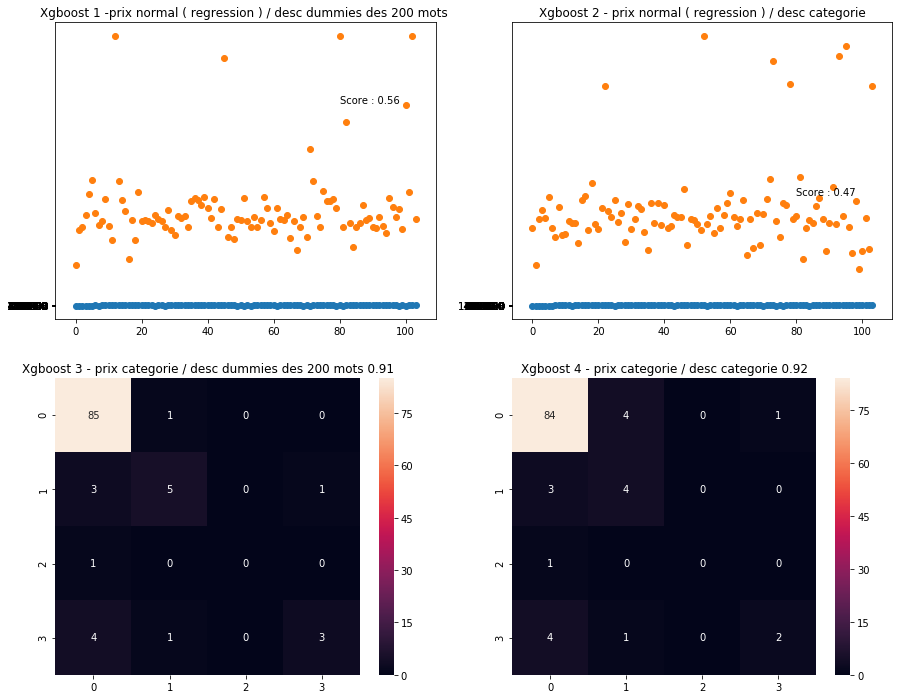

In [67]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.scatter(range(len(ytest1)),ytest1)
plt.scatter(range(len(ypredXgboost1)),ypredXgboost1)
plt.text(80,90000,"Score : "+str(round(Xgboost1.best_estimator_.score(Xtest1,ytest1),2)))
plt.title("Xgboost 1 -prix normal ( regression ) / desc dummies des 200 mots ")
plt.subplot(2,2,2)
plt.scatter(range(len(ytest2)),ytest2)
plt.scatter(range(len(ypredXgboost2)),ypredXgboost2)
plt.text(80,50000,"Score : "+str(round(Xgboost2.best_estimator_.score(Xtest2,ytest2),2)))
plt.title("Xgboost 2 - prix normal ( regression ) / desc categorie")
plt.subplot(2,2,3)
conf3 = confusion_matrix(ytest3,ypredXgboost3)
sns.heatmap(conf3,annot=True)
plt.title("Xgboost 3 - prix categorie / desc dummies des 200 mots "+ str(round(Xgboost3.best_score_,2)))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.subplot(2,2,4)
conf4 = confusion_matrix(ytest4,ypredXgboost4)
sns.heatmap(conf4,annot=True)
plt.plot(label="Score : "+str(Xgboost4.best_score_))
plt.title("Xgboost 4 - prix categorie / desc categorie "+ str(round(Xgboost4.best_score_,2)))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [85]:
print('Variance:', explained_variance_score(ytest1,ypredXgboost1),'\nMae :', mean_absolute_error(ytest1,ypredXgboost1),'\nMse :', mean_squared_error(ytest1,ypredXgboost1),'\nR² :', r2_score(ytest1,ypredXgboost1),'\n')
print('Variance:', explained_variance_score(ytest2,ypredXgboost2),'\nMae :', mean_absolute_error(ytest2,ypredXgboost2),'\nMse :', mean_squared_error(ytest2,ypredXgboost2),'\nR² :', r2_score(ytest2,ypredXgboost2))
print(classification_report(ytest3,ypredXgboost3))
print(classification_report(ytest4,ypredXgboost4))
un = [explained_variance_score(ytest1,ypredXgboost1),mean_absolute_error(ytest1,ypredXgboost1),mean_squared_error(ytest1,ypredXgboost1),r2_score(ytest1,ypredXgboost1)]
deux = [explained_variance_score(ytest2,ypredXgboost2),mean_absolute_error(ytest2,ypredXgboost2),mean_squared_error(ytest2,ypredXgboost2),r2_score(ytest2,ypredXgboost2)]
resXgboost = pd.DataFrame([un,deux],columns=["Variance","MAE",'MSE','R²'], index =['XgboostReg1','XgboostReg2'])
un = [precision_score(ytest3,ypredXgboost3,average="weighted"),recall_score(ytest3,ypredXgboost3,average="weighted"),accuracy_score(ytest3,ypredXgboost3)]
deux = [precision_score(ytest4,ypredXgboost4,average="weighted"),recall_score(ytest4,ypredXgboost4,average="weighted"),accuracy_score(ytest4,ypredXgboost4)]
resclassXgboost = pd.DataFrame([un,deux],columns=["Precision","Recall",'Accuracy'], index =['XGBoostclass1','XGBoostclass2'])

Variance: 0.5730499013086323 
Mae : 6994.400165264423 
Mse : 115275797.62600414 
R² : 0.5620111720875478 

Variance: 0.4835712204308803 
Mae : 10148.45000751202 
Mse : 314980548.04356587 
R² : 0.4738458445676711
                         precision    recall  f1-score   support

              25a60Kans       0.91      0.99      0.95        86
             60a200Kans       0.71      0.56      0.63         9
millionnairestoutlesans       0.00      0.00      0.00         1
          moinsde25Kans       0.75      0.38      0.50         8

               accuracy                           0.89       104
              macro avg       0.59      0.48      0.52       104
           weighted avg       0.88      0.89      0.88       104

                         precision    recall  f1-score   support

              25a60Kans       0.91      0.94      0.93        89
             60a200Kans       0.44      0.57      0.50         7
millionnairestoutlesans       0.00      0.00      0.00         1
    

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
print('Xgboost 1',Xgboost1.best_params_)
print('Xgboost 2',Xgboost2.best_params_)
print('Xgboost 3',Xgboost3.best_params_)
print('Xgboost 4',Xgboost4.best_params_)

Xgboost 1 {'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.8}
Xgboost 2 {'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 1.0}
Xgboost 3 {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0}
Xgboost 4 {'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8}


<h1 style='text-align:center'>SGD model </h1>

In [18]:
parametre = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
sgdr = SGDRegressor()
SGDRegressor1 = GridSearchCV(sgdr, parametre,verbose=1,n_jobs=4)
SGDRegressor1.fit(Xtrain1, ytrain1)
ypredSGDRegressor1 = SGDRegressor1.predict(Xtest1)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SGDRegressor2 = GridSearchCV(sgdr, parametre,verbose=1,n_jobs=4)
SGDRegressor2.fit(Xtrain2, ytrain2)
ypredSGDRegressor2 = SGDRegressor2.predict(Xtest2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
parametre = {
    'alpha' : 10.0**-np.arange(1,7),
    'l1_ratio':[.05, .15, .5, .7, .9, .95, .99, 1]
}
sgdc = SGDClassifier()
SGDClassifier3 = GridSearchCV(sgdc, parametre,verbose=1,n_jobs=4)
SGDClassifier3.fit(Xtrain3, ytrain3)
ypredSGDClassifier3 = SGDClassifier3.predict(Xtest3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SGDClassifier4 = GridSearchCV(sgdc, parametre,verbose=1,n_jobs=4)
SGDClassifier4.fit(Xtrain4, ytrain4)
ypredSGDClassifier4 = SGDClassifier4.predict(Xtest4)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=4)]: Done  62 tasks      | elapsed:    6.4s
[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:   24.7s
[Parallel(n_jobs=4)]: Done 462 tasks      | elapsed:   53.7s
[Parallel(n_jobs=4)]: Done 486 out of 486 | elapsed:   57.7s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done 208 tasks      | elapsed:   31.3s
[Parallel(n_jobs=4)]: Done 458 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 486 out of 486 | elapsed:  1.2min finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=4)]: Done 130 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 144 out of 144 | elapsed:    0.6s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=4

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=4)]: Done 130 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 144 out of 144 | elapsed:    0.9s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


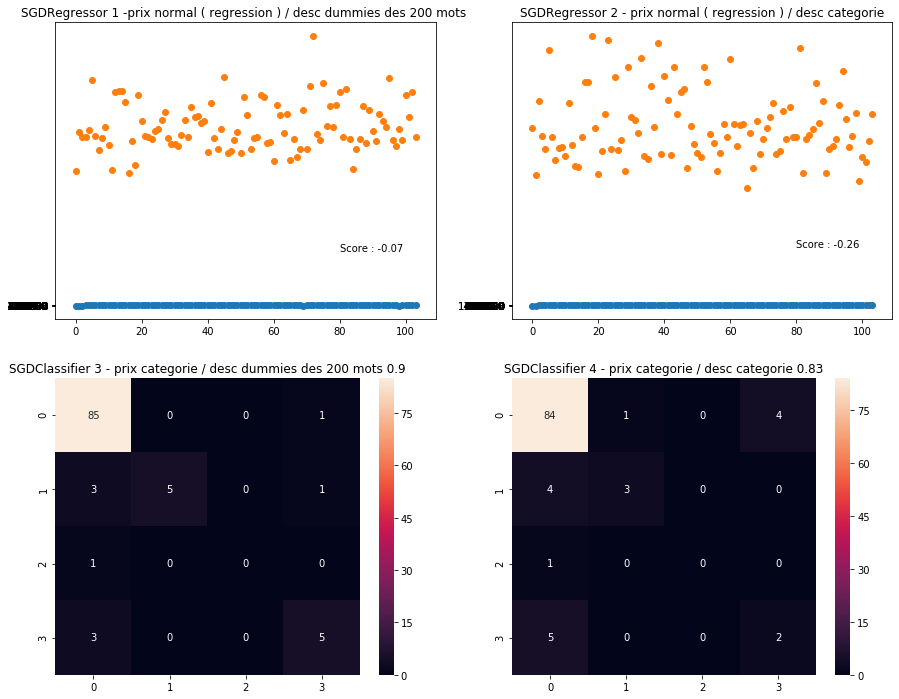

In [19]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.scatter(range(len(ytest1)),ytest1)
plt.scatter(range(len(ypredSGDRegressor1)),ypredSGDRegressor1)
plt.text(80,10000,"Score : "+str(round(SGDRegressor1.best_estimator_.score(Xtest1,ytest1),2)))
plt.title("SGDRegressor 1 -prix normal ( regression ) / desc dummies des 200 mots ")
plt.subplot(2,2,2)
plt.scatter(range(len(ytest2)),ytest2)
plt.scatter(range(len(ypredSGDRegressor2)),ypredSGDRegressor2)
plt.text(80,10000,"Score : "+str(round(SGDRegressor2.best_estimator_.score(Xtest2,ytest2),2)))
plt.title("SGDRegressor 2 - prix normal ( regression ) / desc categorie")
plt.subplot(2,2,3)
conf3 = confusion_matrix(ytest3,ypredSGDClassifier3)
sns.heatmap(conf3,annot=True)
plt.title("SGDClassifier 3 - prix categorie / desc dummies des 200 mots "+ str(round(SGDClassifier3.best_score_,2)))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.subplot(2,2,4)
conf4 = confusion_matrix(ytest4,ypredSGDClassifier4)
sns.heatmap(conf4,annot=True)
plt.plot(label="Score : "+str(SGDClassifier4.best_score_))
plt.title("SGDClassifier 4 - prix categorie / desc categorie "+ str(round(SGDClassifier4.best_score_,2)))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [86]:
print('Variance:', explained_variance_score(ytest1,ypredSGDRegressor1),'\nMae :', mean_absolute_error(ytest1,ypredSGDRegressor1),'\nMse :', mean_squared_error(ytest1,ypredSGDRegressor1),'\nR² :', r2_score(ytest1,ypredSGDRegressor1),'\n')
print('Variance:', explained_variance_score(ytest2,ypredSGDRegressor2),'\nMae :', mean_absolute_error(ytest2,ypredSGDRegressor2),'\nMse :', mean_squared_error(ytest2,ypredSGDRegressor2),'\nR² :', r2_score(ytest2,ypredSGDRegressor2))
print(classification_report(ytest3,ypredSGDClassifier3))
print(classification_report(ytest4,ypredSGDClassifier4))
un = [explained_variance_score(ytest1,ypredSGDRegressor1),mean_absolute_error(ytest1,ypredSGDRegressor1),mean_squared_error(ytest1,ypredSGDRegressor1),r2_score(ytest1,ypredSGDRegressor1)]
deux = [explained_variance_score(ytest2,ypredSGDRegressor2),mean_absolute_error(ytest2,ypredSGDRegressor2),mean_squared_error(ytest2,ypredSGDRegressor2),r2_score(ytest2,ypredSGDRegressor2)]
resreSGD = pd.DataFrame([un,deux],columns=["Variance","MAE",'MSE','R²'], index =['SGDReg1','SGDReg2'])
un = [precision_score(ytest3,ypredSGDClassifier3,average="weighted"),recall_score(ytest3,ypredSGDClassifier3,average="weighted"),accuracy_score(ytest3,ypredSGDClassifier3)]
deux = [precision_score(ytest4,ypredSGDClassifier4,average="weighted"),recall_score(ytest4,ypredSGDClassifier4,average="weighted"),accuracy_score(ytest4,ypredSGDClassifier4)]
resclassSGD = pd.DataFrame([un,deux],columns=["Precision","Recall",'Accuracy'], index =['SGDclass1','SGDclass2'])

Variance: 0.2313756951874465 
Mae : 10451.891461318146 
Mse : 281444575.49135876 
R² : -0.06934484324028212 

Variance: 0.12082600997979587 
Mae : 16661.162704774753 
Mse : 751770379.5009512 
R² : -0.2557826556662637
                         precision    recall  f1-score   support

              25a60Kans       0.92      0.99      0.96        86
             60a200Kans       1.00      0.56      0.71         9
millionnairestoutlesans       0.00      0.00      0.00         1
          moinsde25Kans       0.71      0.62      0.67         8

               accuracy                           0.91       104
              macro avg       0.66      0.54      0.58       104
           weighted avg       0.91      0.91      0.90       104

                         precision    recall  f1-score   support

              25a60Kans       0.89      0.94      0.92        89
             60a200Kans       0.75      0.43      0.55         7
millionnairestoutlesans       0.00      0.00      0.00         1

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
print('SGDRegressor 1',SGDRegressor1.best_params_)
print('SGDRegressor 2',SGDRegressor2.best_params_)
print('SGDClassifier 3',SGDClassifier3.best_params_)
print('SGDClassifier 4',SGDClassifier4.best_params_)

SGDRegressor 1 {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'epsilon_insensitive', 'penalty': 'l2'}
SGDRegressor 2 {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'epsilon_insensitive', 'penalty': 'l2'}
SGDClassifier 3 {'alpha': 0.01, 'l1_ratio': 0.15}
SGDClassifier 4 {'alpha': 0.001, 'l1_ratio': 0.15}


<h1 style='text-align:center'>Lasso / SVC </h1>

In [22]:
parametre = {
    'alpha': [1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06],
    'precompute': [True, False],
    'selection': ['cyclic', 'random']
}
lasso = Lasso()
lasso1 = GridSearchCV(lasso, parametre,verbose=1,n_jobs=4)
lasso1.fit(Xtrain1, ytrain1)
ypredlasso1 = lasso1.predict(Xtest1)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
lasso2 = GridSearchCV(lasso, parametre,verbose=1,n_jobs=4)
lasso2.fit(Xtrain2, ytrain2)
ypredlasso2 = lasso2.predict(Xtest2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
parametre = {
    'C': [0.1,1, 10, 100],
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
svc = SVC()
SvectorC3 = GridSearchCV(svc, parametre,verbose=1,n_jobs=4)
SvectorC3.fit(Xtrain3, ytrain3)
ypredSvectorC3 = SvectorC3.predict(Xtest3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SvectorC4 = GridSearchCV(svc, parametre,verbose=1,n_jobs=4)
SvectorC4.fit(Xtrain4, ytrain4)
ypredSvectorC4 = SvectorC4.predict(Xtest4)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed:    0.3s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed:    0.3s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=4)]: Done 123 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 144 out of 144 | elapsed:    1.1s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=4

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=4)]: Done 125 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 144 out of 144 | elapsed:    1.5s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


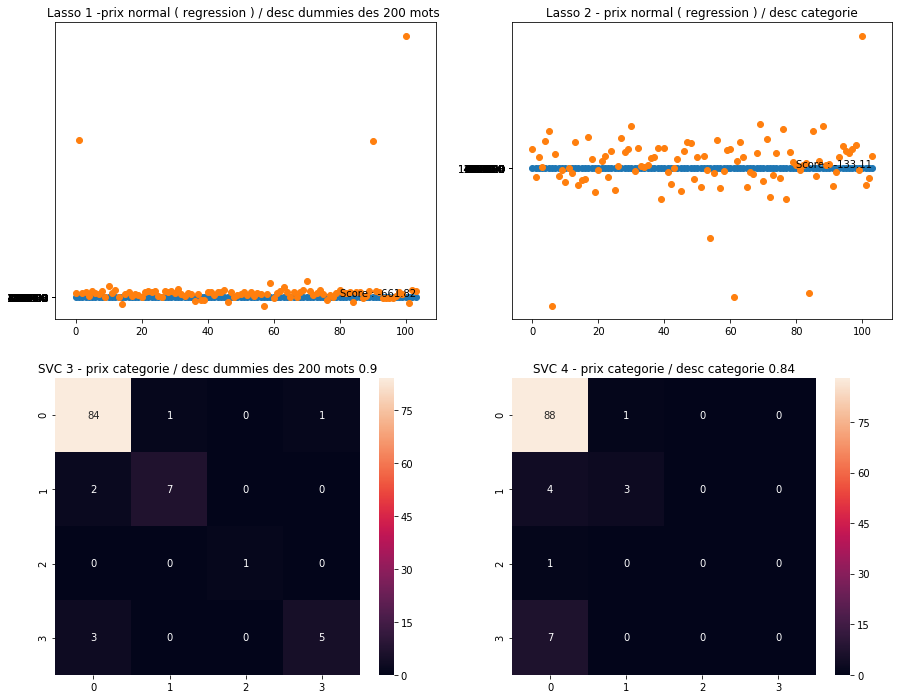

In [23]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.scatter(range(len(ytest1)),ytest1)
plt.scatter(range(len(ypredlasso1)),ypredlasso1)
plt.text(80,10000,"Score : "+str(round(lasso1.best_estimator_.score(Xtest1,ytest1),2)))
plt.title("Lasso 1 -prix normal ( regression ) / desc dummies des 200 mots ")
plt.subplot(2,2,2)
plt.scatter(range(len(ytest2)),ytest2)
plt.scatter(range(len(ypredlasso2)),ypredlasso2)
plt.text(80,10000,"Score : "+str(round(lasso2.best_estimator_.score(Xtest2,ytest2),2)))
plt.title("Lasso 2 - prix normal ( regression ) / desc categorie")
plt.subplot(2,2,3)
conf3 = confusion_matrix(ytest3,ypredSvectorC3)
sns.heatmap(conf3,annot=True)
plt.title("SVC 3 - prix categorie / desc dummies des 200 mots "+ str(round(SvectorC3.best_score_,2)))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.subplot(2,2,4)
conf4 = confusion_matrix(ytest4,ypredSvectorC4)
sns.heatmap(conf4,annot=True)
plt.plot(label="Score : "+str(SvectorC4.best_score_))
plt.title("SVC 4 - prix categorie / desc categorie "+ str(round(SvectorC4.best_score_,2)))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [87]:
print('Variance:', explained_variance_score(ytest1,ypredlasso1),'\nMae :', mean_absolute_error(ytest1,ypredlasso1),'\nMse :', mean_squared_error(ytest1,ypredlasso1),'\nR² :', r2_score(ytest1,ypredlasso1),'\n')
print('Variance:', explained_variance_score(ytest2,ypredlasso2),'\nMae :', mean_absolute_error(ytest2,ypredlasso2),'\nMse :', mean_squared_error(ytest2,ypredlasso2),'\nR² :', r2_score(ytest2,ypredlasso2))
print(classification_report(ytest3,ypredSvectorC3))
print(classification_report(ytest4,ypredSvectorC4))
un = [explained_variance_score(ytest1,ypredlasso1),mean_absolute_error(ytest1,ypredlasso1),mean_squared_error(ytest1,ypredlasso1),r2_score(ytest1,ypredlasso1)]
deux = [explained_variance_score(ytest2,ypredlasso2),mean_absolute_error(ytest2,ypredlasso2),mean_squared_error(ytest2,ypredlasso2),r2_score(ytest2,ypredlasso2)]
resreglasso = pd.DataFrame([un,deux],columns=["Variance","MAE",'MSE','R²'], index =['LassoReg1','LassoReg2'])
un = [precision_score(ytest3,ypredSvectorC3,average="weighted"),recall_score(ytest3,ypredSvectorC3,average="weighted"),accuracy_score(ytest3,ypredSvectorC3)]
deux = [precision_score(ytest4,ypredSvectorC4,average="weighted"),recall_score(ytest4,ypredSvectorC4,average="weighted"),accuracy_score(ytest4,ypredSvectorC4)]
resclassSVC = pd.DataFrame([un,deux],columns=["Precision","Recall",'Accuracy'], index =['SVCclass1','SVCclass2'])

Variance: -642.971073502467 
Mae : 106030.63270402372 
Mse : 174449415944.03223 
R² : -661.8181872766544 

Variance: -132.12199035539206 
Mae : 166279.85324052582 
Mse : 80282625619.63693 
R² : -133.10681180524023
                         precision    recall  f1-score   support

              25a60Kans       0.94      0.98      0.96        86
             60a200Kans       0.88      0.78      0.82         9
millionnairestoutlesans       1.00      1.00      1.00         1
          moinsde25Kans       0.83      0.62      0.71         8

               accuracy                           0.93       104
              macro avg       0.91      0.84      0.87       104
           weighted avg       0.93      0.93      0.93       104

                         precision    recall  f1-score   support

              25a60Kans       0.88      0.99      0.93        89
             60a200Kans       0.75      0.43      0.55         7
millionnairestoutlesans       0.00      0.00      0.00         1
  

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
print('SGDRegressor 1',lasso1.best_params_)
print('SGDRegressor 2',lasso2.best_params_)
print('SGDClassifier 3',SvectorC3.best_params_)
print('SGDClassifier 4',SvectorC4.best_params_)

SGDRegressor 1 {'alpha': 0.001, 'precompute': False, 'selection': 'random'}
SGDRegressor 2 {'alpha': 0.001, 'precompute': True, 'selection': 'random'}
SGDClassifier 3 {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SGDClassifier 4 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


<h1 style='text-align:center'>Ridge / Nayves Bayes </h1>

In [26]:
parametre = {
    'alpha':[0.02, 0.024, 0.025, 0.026, 0.03],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
}
ridge = Ridge()
ridge1 = GridSearchCV(ridge, parametre,verbose=1,n_jobs=4)
ridge1.fit(Xtrain1, ytrain1)
ypredridge1 = ridge1.predict(Xtest1)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ridge2 = GridSearchCV(ridge, parametre,verbose=1,n_jobs=4)
ridge2.fit(Xtrain2, ytrain2)
ypredridge2 = ridge2.predict(Xtest2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
parametre = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
gnb = GaussianNB()
gnb3 = GridSearchCV(gnb, parametre,verbose=1,n_jobs=4)
gnb3.fit(Xtrain3, ytrain3)
ypredgnb3 = gnb3.predict(Xtest3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
gnb4 = GridSearchCV(gnb, parametre,verbose=1,n_jobs=4)
gnb4.fit(Xtrain4, ytrain4)
ypredgnb4 = gnb4.predict(Xtest4)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.3s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using b

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.6s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Done 220 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.9s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=4

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Done 235 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    1.2s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


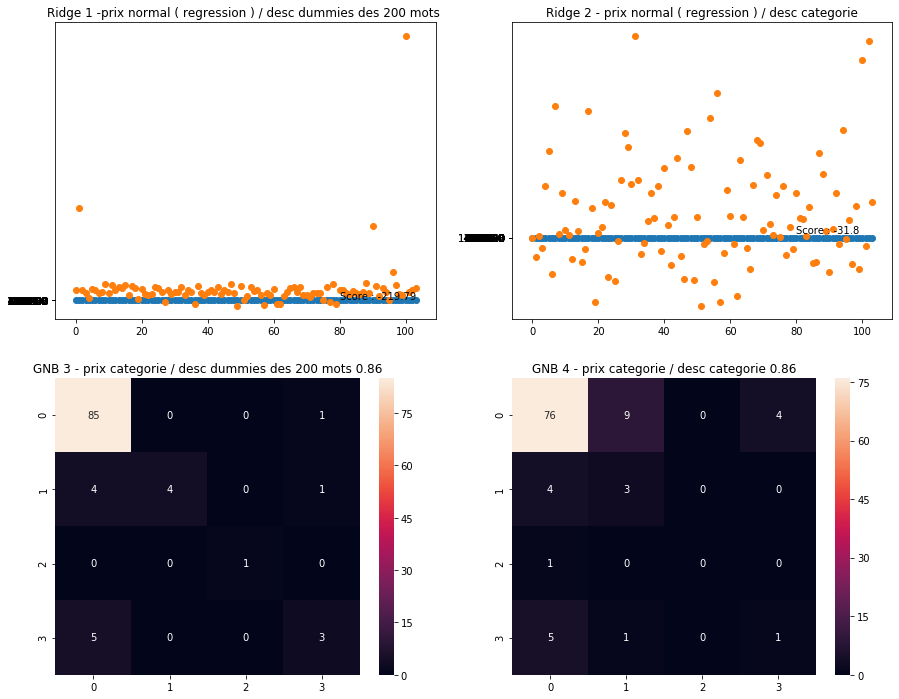

In [27]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.scatter(range(len(ytest1)),ytest1)
plt.scatter(range(len(ypredridge1)),ypredridge1)
plt.text(80,10000,"Score : "+str(round(ridge1.best_estimator_.score(Xtest1,ytest1),2)))
plt.title("Ridge 1 -prix normal ( regression ) / desc dummies des 200 mots ")
plt.subplot(2,2,2)
plt.scatter(range(len(ytest2)),ytest2)
plt.scatter(range(len(ypredridge2)),ypredridge2)
plt.text(80,10000,"Score : "+str(round(ridge2.best_estimator_.score(Xtest2,ytest2),2)))
plt.title("Ridge 2 - prix normal ( regression ) / desc categorie")
plt.subplot(2,2,3)
conf3 = confusion_matrix(ytest3,ypredgnb3)
sns.heatmap(conf3,annot=True)
plt.title("GNB 3 - prix categorie / desc dummies des 200 mots "+ str(round(gnb3.best_score_,2)))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.subplot(2,2,4)
conf4 = confusion_matrix(ytest4,ypredgnb4)
sns.heatmap(conf4,annot=True)
plt.plot(label="Score : "+str(gnb4.best_score_))
plt.title("GNB 4 - prix categorie / desc categorie "+ str(round(gnb4.best_score_,2)))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [88]:
print('Variance:', explained_variance_score(ytest1,ypredridge1),'\nMae :', mean_absolute_error(ytest1,ypredridge1),'\nMse :', mean_squared_error(ytest1,ypredridge1),'\nR² :', r2_score(ytest1,ypredridge1),'\n')
print('Variance:', explained_variance_score(ytest2,ypredridge2),'\nMae :', mean_absolute_error(ytest2,ypredridge2),'\nMse :', mean_squared_error(ytest2,ypredridge2),'\nR² :', r2_score(ytest2,ypredridge2))
print(classification_report(ytest3,ypredgnb3))
print(classification_report(ytest4,ypredgnb4))
un = [explained_variance_score(ytest1,ypredridge1),mean_absolute_error(ytest1,ypredridge1),mean_squared_error(ytest1,ypredridge1),r2_score(ytest1,ypredridge1)]
deux = [explained_variance_score(ytest2,ypredridge2),mean_absolute_error(ytest2,ypredridge2),mean_squared_error(ytest2,ypredridge2),r2_score(ytest2,ypredridge2)]
resregridge = pd.DataFrame([un,deux],columns=["Variance","MAE",'MSE','R²'], index =['RidgeReg1','RidgeReg2'])
un = [precision_score(ytest3,ypredgnb3,average="weighted"),recall_score(ytest3,ypredgnb3,average="weighted"),accuracy_score(ytest3,ypredgnb3)]
deux = [precision_score(ytest4,ypredgnb4,average="weighted"),recall_score(ytest4,ypredgnb4,average="weighted"),accuracy_score(ytest4,ypredgnb4)]
resclassGNB = pd.DataFrame([un,deux],columns=["Precision","Recall",'Accuracy'], index =['GNBclass1','GNBclass2'])

Variance: -206.42055112671596 
Mae : 77384.71168008875 
Mse : 58110693219.415 
R² : -219.79078988398328 

Variance: -31.355137630721003 
Mae : 103172.1280511343 
Mse : 19634275013.46092 
R² : -31.79775672307467
                         precision    recall  f1-score   support

              25a60Kans       0.90      0.99      0.94        86
             60a200Kans       1.00      0.44      0.62         9
millionnairestoutlesans       1.00      1.00      1.00         1
          moinsde25Kans       0.60      0.38      0.46         8

               accuracy                           0.89       104
              macro avg       0.88      0.70      0.76       104
           weighted avg       0.89      0.89      0.88       104

                         precision    recall  f1-score   support

              25a60Kans       0.88      0.85      0.87        89
             60a200Kans       0.23      0.43      0.30         7
millionnairestoutlesans       0.00      0.00      0.00         1
     

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
print('ridge 1',ridge1.best_params_)
print('ridge 2',ridge2.best_params_)
print('Naives Bayesienne 3',gnb3.best_params_)
print('Naives Bayesienne 4',gnb4.best_params_)

ridge 1 {'alpha': 0.03, 'solver': 'sparse_cg'}
ridge 2 {'alpha': 0.025, 'solver': 'lsqr'}
Naives Bayesienne 3 {'var_smoothing': 0.1}
Naives Bayesienne 4 {'var_smoothing': 8.111308307896872e-05}


In [100]:
Classificationresult = pd.concat([resclassforest,resclassXgboost,resclassSGD,resclassSVC,resclassGNB])
Classificationresult

,Precision,Recall,Accuracy
Forestclass1,0.700472,0.769231,0.769231
Forestclass2,0.724784,0.798077,0.798077
XGBoostclass1,0.875295,0.894231,0.894231
XGBoostclass2,0.856141,0.865385,0.865385
SGDclass1,0.905489,0.913462,0.913462
SGDclass2,0.837647,0.855769,0.855769
SVCclass1,0.929906,0.932692,0.932692
SVCclass2,0.803558,0.875000,0.875000
GNBclass1,0.890057,0.894231,0.894231
GNBclass2,0.785255,0.769231,0.769231


In [101]:
regretionresult =pd.concat([resregforest,resXgboost,resreSGD,resreglasso,resregridge])
regretionresult

,Variance,MAE,MSE,R²
ForestReg1,-1.157344,14499.772115,5.715205e+08,-1.171484
ForestReg2,-4.392400,20055.862603,3.235942e+09,-4.405427
XgboostReg1,0.573050,6994.400165,1.152758e+08,0.562011
XgboostReg2,0.483571,10148.450008,3.149805e+08,0.473846
SGDReg1,0.231376,10451.891461,2.814446e+08,-0.069345
SGDReg2,0.120826,16661.162705,7.517704e+08,-0.255783
LassoReg1,-642.971074,106030.632704,1.744494e+11,-661.818187
LassoReg2,-132.121990,166279.853241,8.028263e+10,-133.106812
RidgeReg1,-206.420551,77384.711680,5.811069e+10,-219.790790
RidgeReg2,-31.355138,103172.128051,1.963428e+10,-31.797757
